In [1]:
import sys; sys.path.append('/sj0243/')

In [2]:
from python_for_nustar.nu_core import np, plt, os, glob, scan_phase_resolved_products, reduce_list, create_dir, pd, make_grppha_and_wd
from python_for_nustar.nu_class import NustarObservation
from python_for_nustar.pipeline.sj0243_init import Nu_path, ObsList
from python_for_nustar.pyxspec_lib.definitions import Model, Xset, AllModels, Fit, Plot, AllData, AllModels, xspec, showmodel
from python_for_nustar.pyxspec_lib.nustar_xspec import fit_spectra, ph_res_param, query_par, scan_containers_ph_res
from python_for_nustar.pyxspec_lib.storage import Container, Storage
#prodpath_ph_res = 'phase_resolved' 
prod_shift = 0
ObsID = ObsList[5] 
nu_obs = NustarObservation(ObsID, nu_path=Nu_path)
ph_ave_folder = nu_obs.products_path+'/spe_and_lc'
ph_res_folder = nu_obs.products_path+'/phase_resolved'

calc_errors = True

AllModels.clear()
Xset.parallel.error = 22



pd.set_option('display.max_columns', 500)

# prod_shift = 0  #0 or 1

# if prod_shift == 0:
#     prodpath_ph_res = 'phase_resolved' 
# elif prod_shift == 1:
#     prodpath_ph_res = 'phase_resolved_shift_1' 


###
Observation 90401334002 loaded successfully


# Observation 90401334002

## Phase-averaged spectra

### cutoffpl (1 gauss, one bb)

Model: constant*phabs(gaussian + cutoffpl + bbodyrad)

P#   C#   Component    Parameter  Unit    Value           Errors      
----------------------------------------------------------------------------
1    1    constant     factor             1.0                           (0.0       , 0.0       )
2    2    phabs        nH         10^22   0.8                           (0.0       , 0.0       )
3    3    gaussian     LineE      keV     6.4                           (0.0       , 0.0       )
4    3    gaussian     Sigma      keV     0.5                           (0.0       , 0.0       )
5    3    gaussian     norm               1.4                           (0.0       , 0.0       )
6    4    cutoffpl     PhoIndex           1.3                           (0.0       , 0.0       )
7    4    cutoffpl     HighECut   keV     20.0                          (0.0       , 0.0       )
8    4    cutoffpl     norm               10.0                          (0.0       , 0.0       )
9    5    bbodyrad   

rm: cannot remove 'xspec/cutoffpl/*90401334002_cutoffpl*': No such file or directory
rm: cannot remove 'xspec/cutoffpl/xcm/*90401334002_cutoffpl*': No such file or directory


 loaded spe_and_lcA_sr.pi and spe_and_lcB_sr.pi from /sj0243/results/out90401334002/products/spe_and_lc
fitting done
skipping errors for: []
    11      1.01584       1.0176    (-0.000876179,0.000877695)
     4     0.401258     0.455603    (-0.0269476,0.0273968)
     5   0.00253296   0.00279767    (-0.000130415,0.000134303)
     6      1.01373      1.03293    (-0.00963457,0.00956729)
     7      22.5636      23.2091    (-0.320265,0.325238)
     8     0.222084     0.227683    (-0.00280588,0.00279285)
     9      2.93085      2.96338    (-0.0163771,0.0161537)
    10       1.7756      1.83204    (-0.0277591,0.0286761)
Fit done 
 chi2 = 2918.1805740304126 for 2699 dof, chi2_red = 1.0812080674436504, H0 prob = 0.00177784735
<Storage with 2 containers>


,N,srcID,comp,par,ipar,val,error_l,error_u,er_status,sigma,frozen,link
0,0,90401334002_cutoffpl_FPMA,constant,factor,1,1.0,0.0,0.0,FFFFFFFFF,0.0,True,
1,0,90401334002_cutoffpl_FPMA,phabs,nH,2,0.8,0.0,0.0,FFFFFFFFF,0.0,True,
2,0,90401334002_cutoffpl_FPMA,gaussian,LineE,3,6.4,0.0,0.0,FFFFFFFFF,0.0,True,
3,0,90401334002_cutoffpl_FPMA,gaussian,Sigma,4,0.427893,0.401258,0.455603,FFFFFFFFF,0.01954,False,
4,0,90401334002_cutoffpl_FPMA,gaussian,norm,5,0.002663,0.002533,0.002798,FFFFFFFFF,0.000109,False,
5,0,90401334002_cutoffpl_FPMA,cutoffpl,PhoIndex,6,1.023357,1.013727,1.032929,FFFFFFFFF,0.009007,False,
6,0,90401334002_cutoffpl_FPMA,cutoffpl,HighECut,7,22.883739,22.563625,23.209128,FFFFFFFFF,0.303634,False,
7,0,90401334002_cutoffpl_FPMA,cutoffpl,norm,8,0.224889,0.222084,0.227683,FFFFFFFFF,0.002648,False,
8,0,90401334002_cutoffpl_FPMA,bbodyrad,kT,9,2.947225,2.930853,2.963384,FFFFFFFFF,0.01488,False,
9,0,90401334002_cutoffpl_FPMA,bbodyrad,norm,10,1.803359,1.7756,1.832036,FFFFFFFFF,0.026666,False,


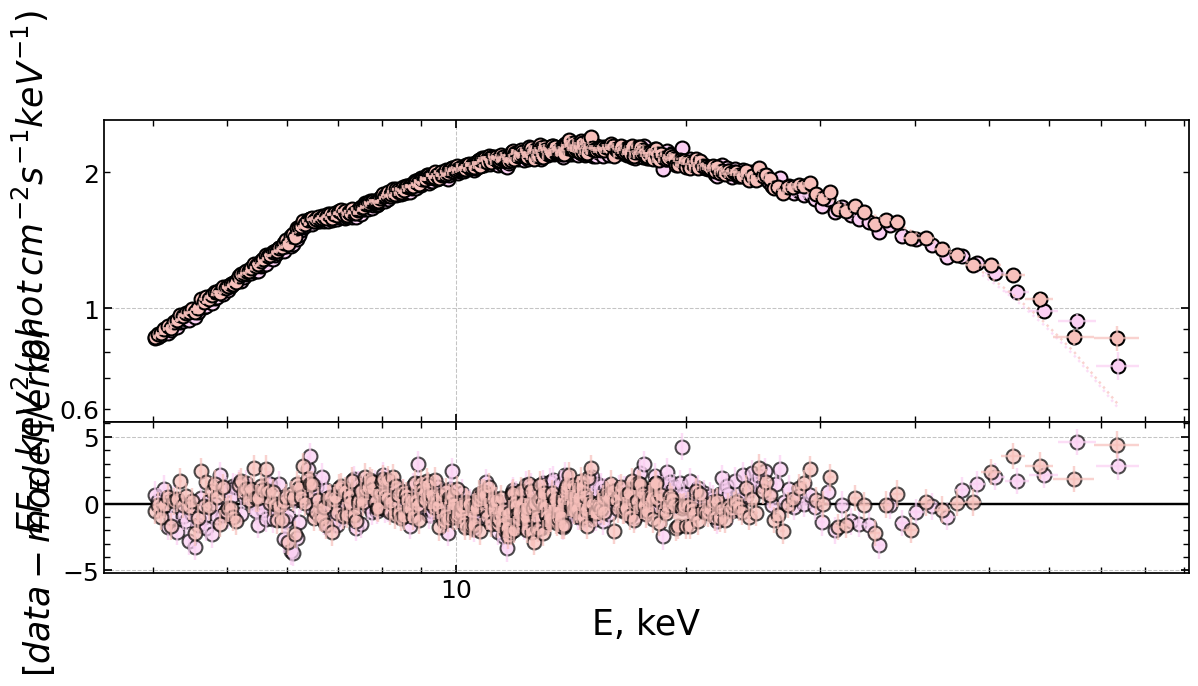

In [3]:
os.chdir(ph_ave_folder)
create_dir('xspec')


mo_cutoffpl = Model("constant*phabs*( gaussian  + (cutoffpl+bbodyrad))")
mo_cutoffpl.phabs.nH = '0.8 -1'

mo_cutoffpl.cutoffpl.PhoIndex = '1.3'
mo_cutoffpl.cutoffpl.HighECut = '20' # ,, 0.1, 0.2, 3, 4'
mo_cutoffpl.cutoffpl.norm = '10'

mo_cutoffpl.bbodyrad.kT = '3'
mo_cutoffpl.bbodyrad.norm = '2' # ,, 0.1, 0.2, 3, 4'


mo_cutoffpl.gaussian.LineE = '6.4 -1'
mo_cutoffpl.gaussian.Sigma = '0.5 ' # ,, 0.1, 0.2, 3, 4'
mo_cutoffpl.gaussian.norm = '1.4'


showmodel(mo_cutoffpl)



model = mo_cutoffpl
model_name = 'cutoffpl'
mo_fid_pars = fit_spectra(model = model, model_name = model_name, prefix = ObsID, dataset='spe_and_lc', min_bin='50', min_sig='50', rewrite = True, calc_errors = calc_errors)
mo_fid_pars

## Phase-resolved spectra

### cutoffpl (2 gauss, one bb)

#### fit

In [4]:
xspec.Xset.restore(f'/sj0243/results/out{ObsID}/products/spe_and_lc/xspec/cutoffpl/xcm/{ObsID}_cutoffpl.xcm_model')
mo_cutoffpl_loaded = AllModels(1)
mo_cutoffpl_loaded.gaussian.Sigma.frozen = True
#mo_cutoffpl_loaded.gsmooth.Sig_6keV.frozen = True

#showmodel(mo_cutoffpl_loaded);

##################### bin number 1 #####################
deleted xspec/cutoffpl/*90401334002_bin1_shift0_cutoffpl* and xspec/cutoffpl/xcm/*90401334002_bin1_shift0_cutoffpl* files
Try loading storage xspec/cutoffpl/90401334002_bin1_shift0_cutoffpl.storage
no storage found. fitting...
 loaded phase_resolved_bin1A_sr.pi and phase_resolved_bin1B_sr.pi from /sj0243/results/out90401334002/products/phase_resolved
fitting done
skipping errors for: []
    11      1.01377      1.01987    (-0.00304296,0.00305619)
     5   0.00246186   0.00294059    (-0.000240015,0.000238713)
     6      1.20524      1.26035    (-0.0278135,0.0273018)
     7      31.8052       35.387    (-1.7053,1.8765)
     8     0.235477     0.258335    (-0.0113616,0.0114966)
     9       2.3499      2.42761    (-0.0386693,0.0390491)
    10      2.92435      3.33564    (-0.196851,0.214436)
Fit done 
 chi2 = 1387.6371515133746 for 1499 dof, chi2_red = 0.9257085733911772, H0 prob = 0.9809738869
<Storage with 2 containers>
#########

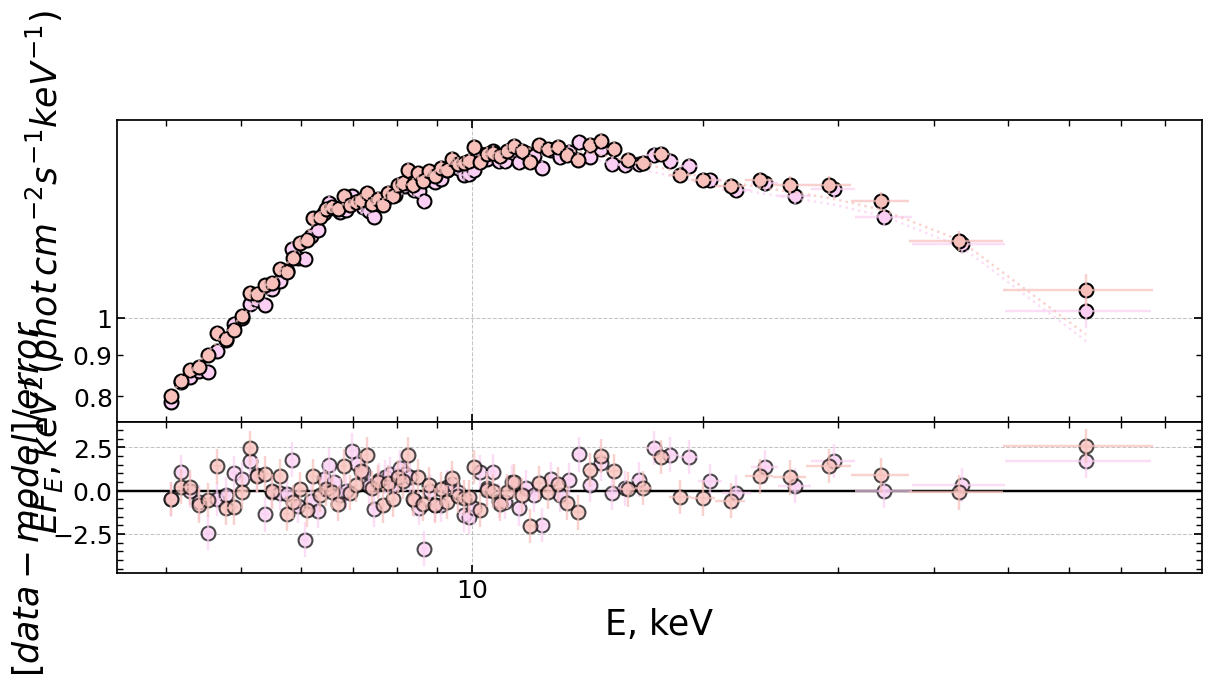

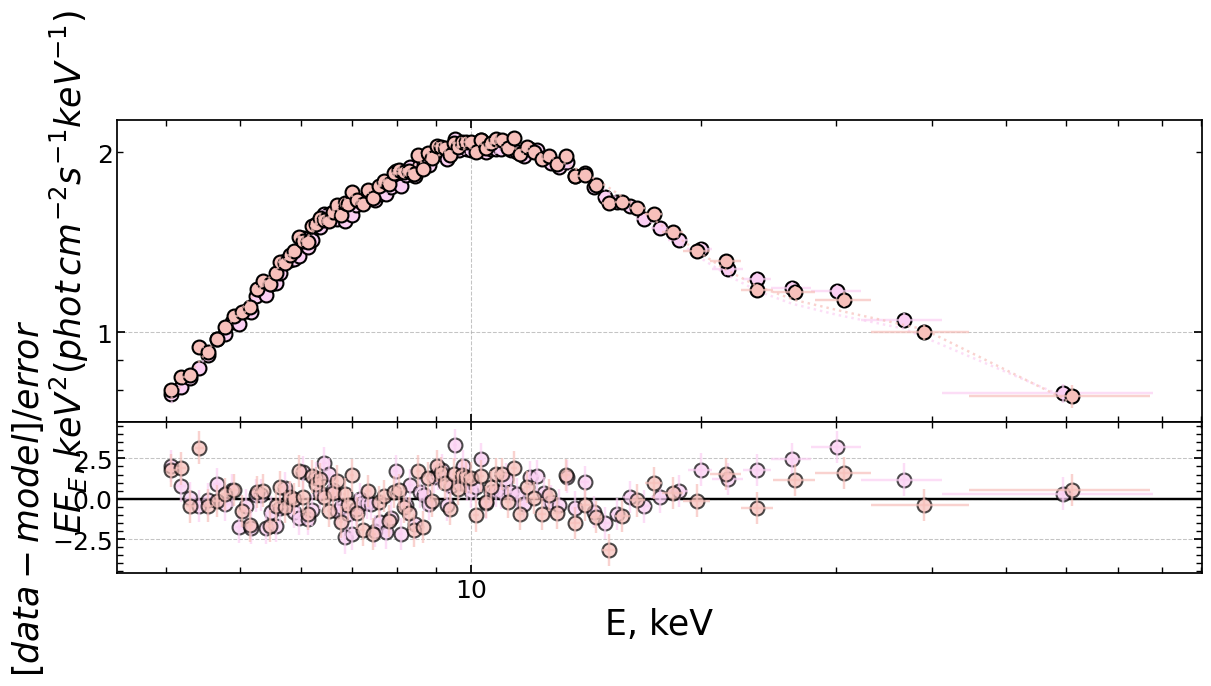

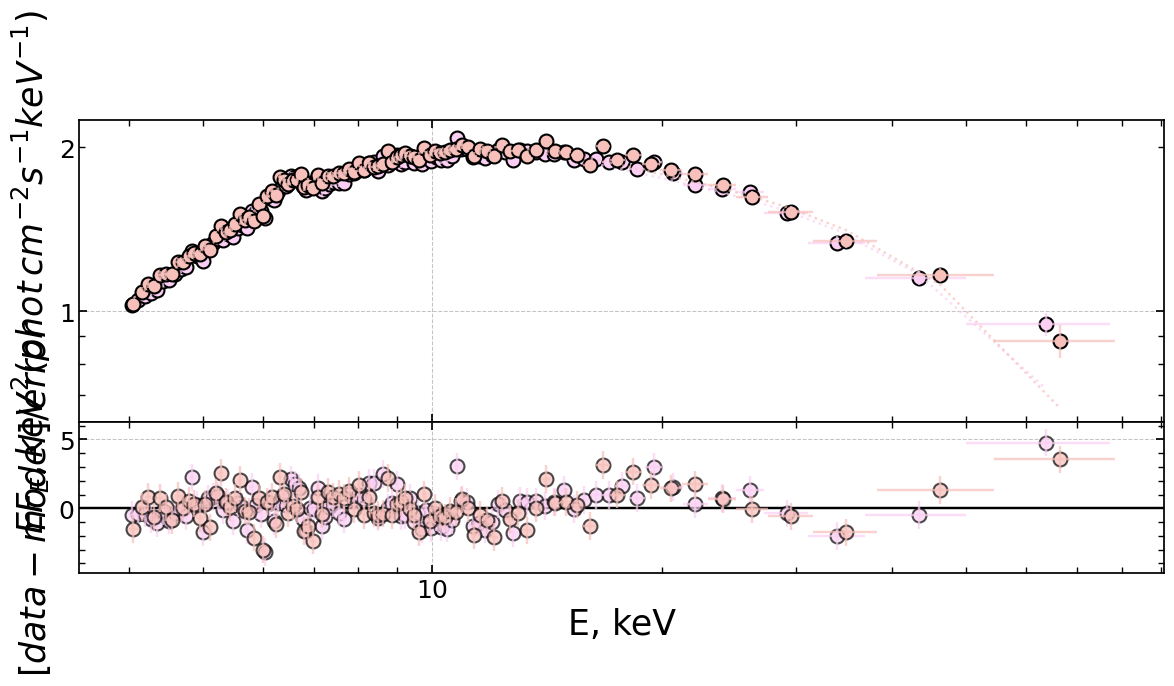

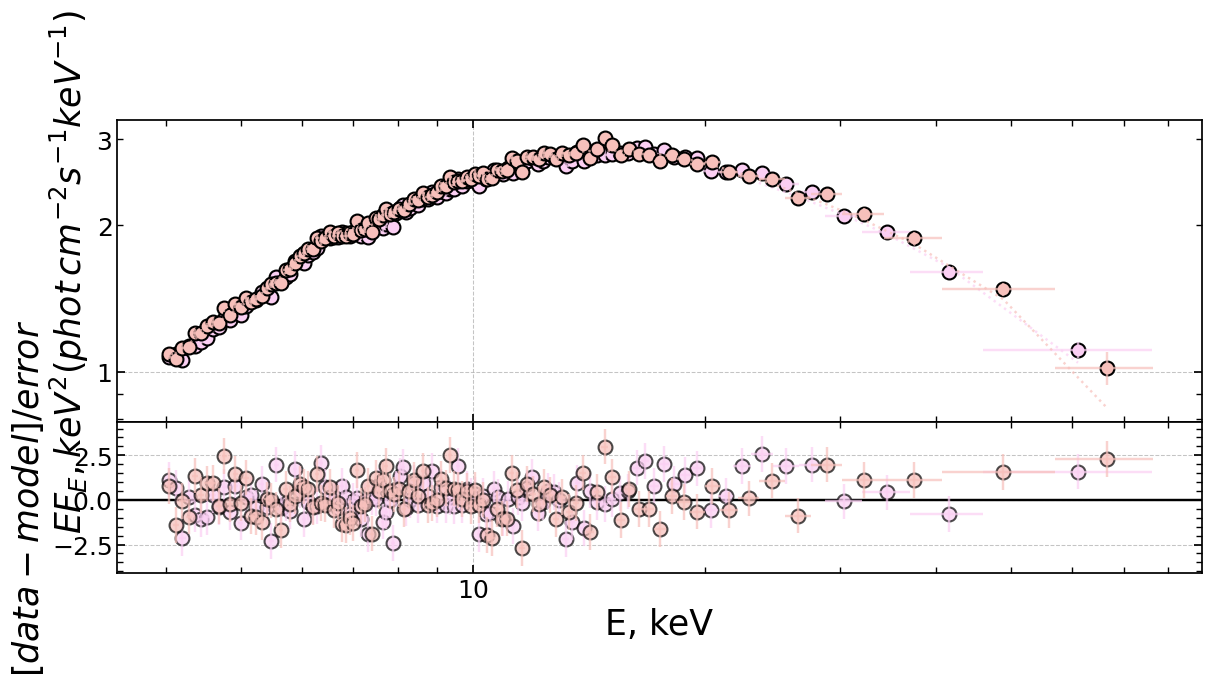

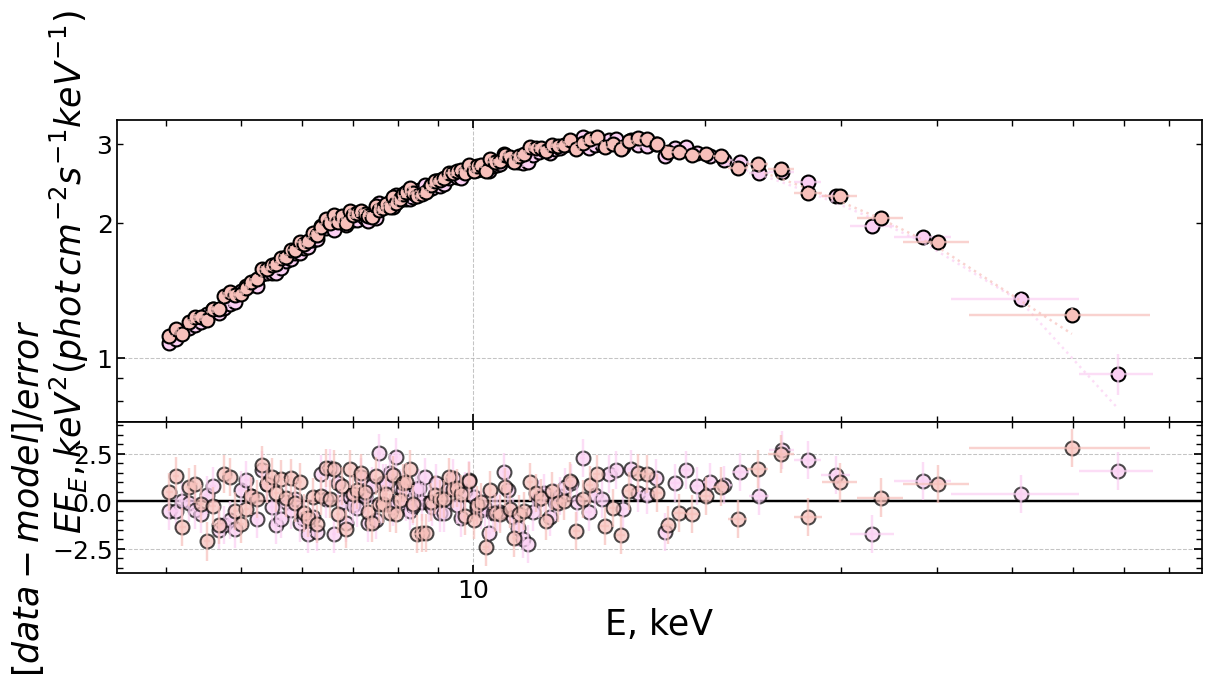

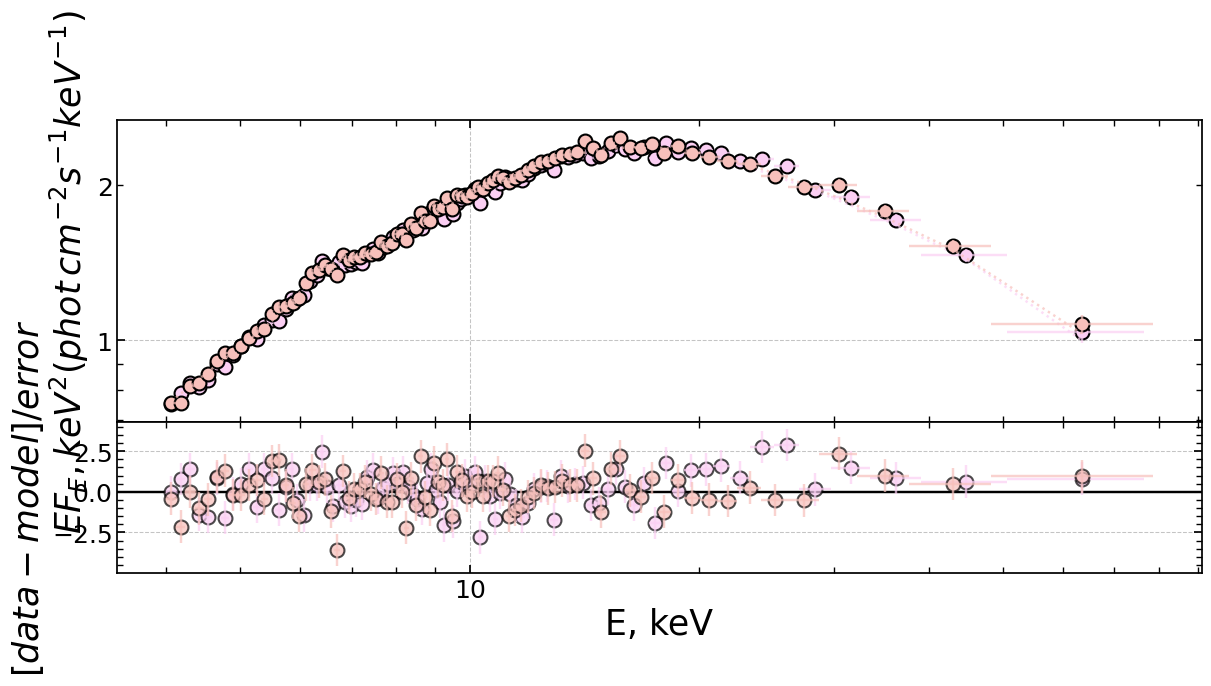

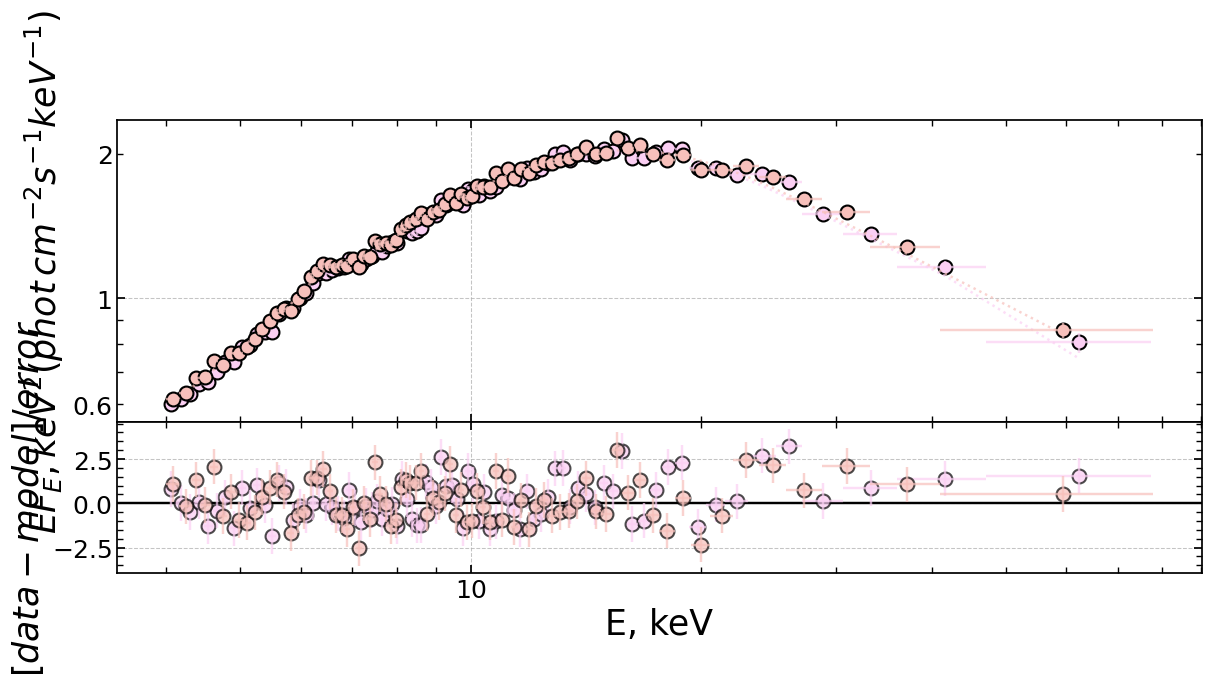

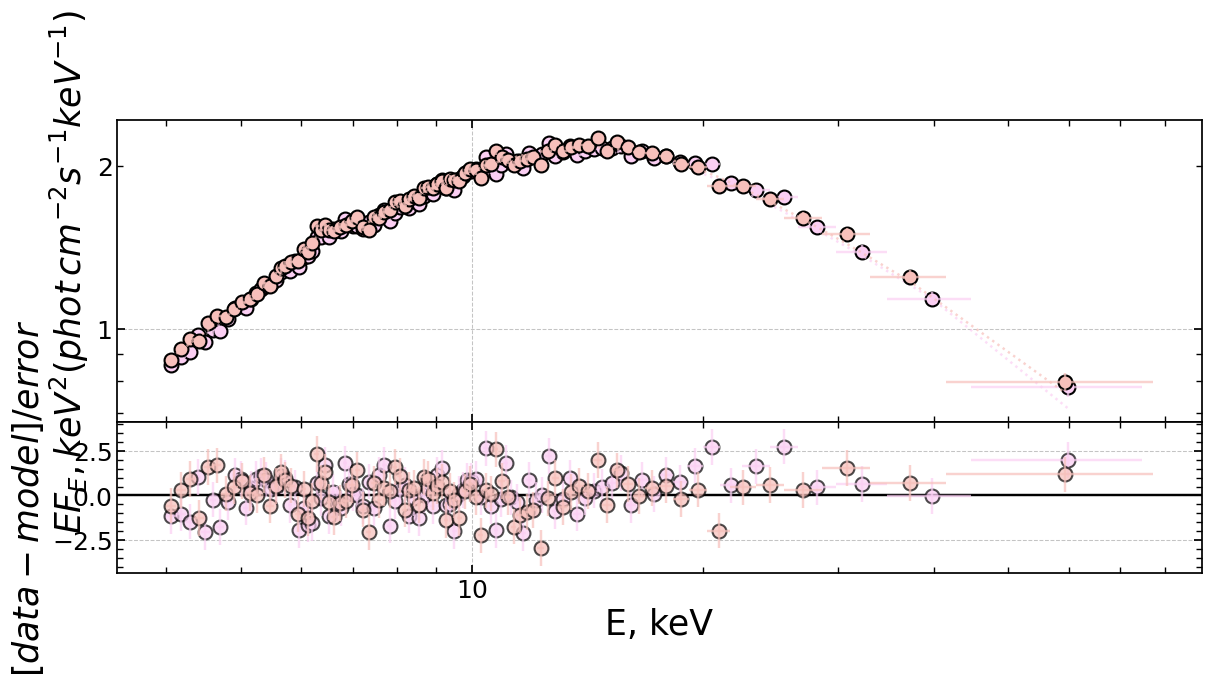

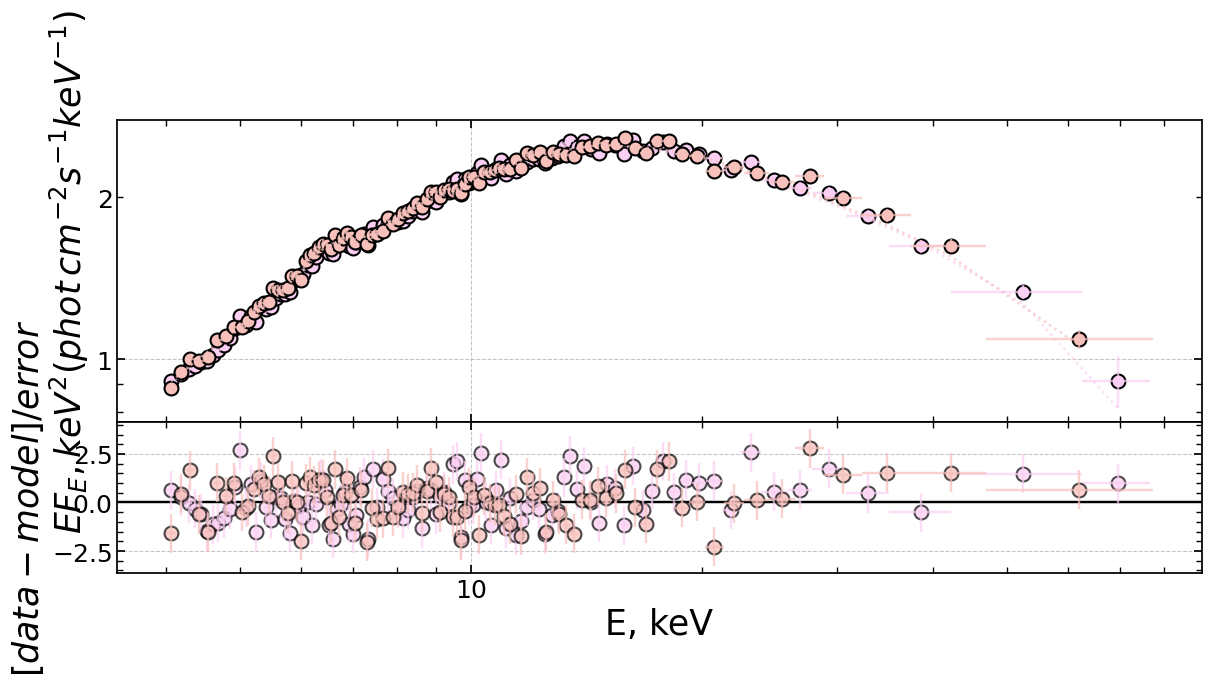

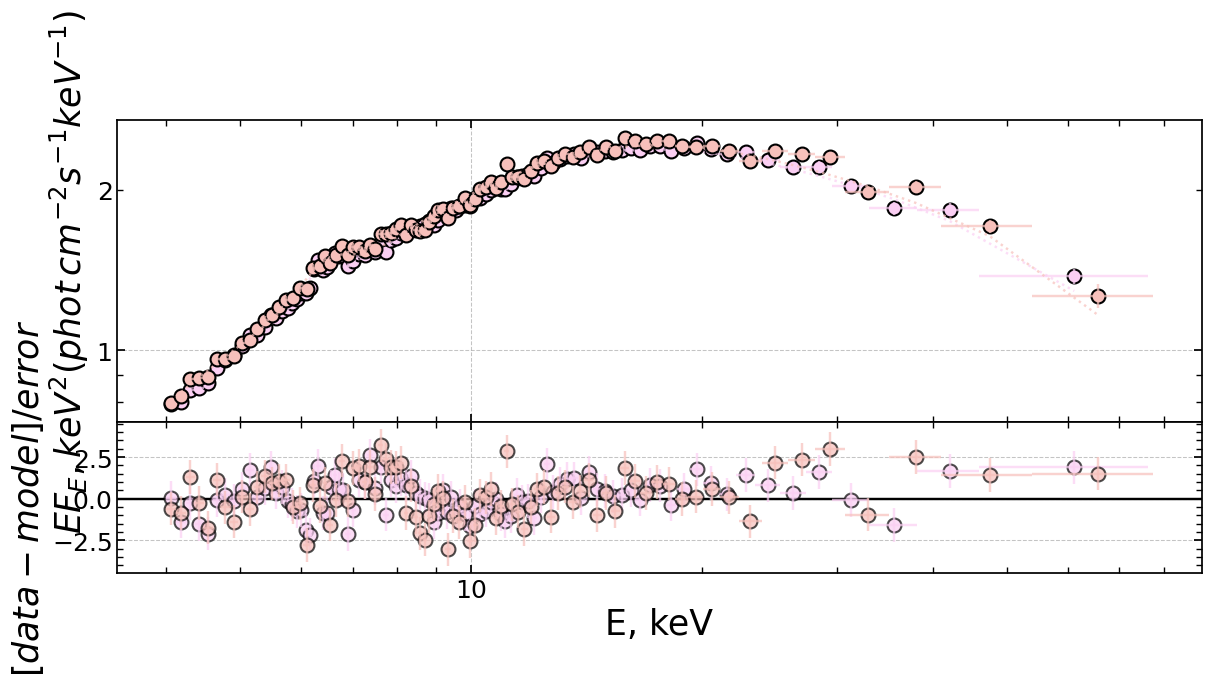

In [5]:
os.chdir(ph_res_folder)
create_dir('xspec')

model = mo_cutoffpl_loaded
model_name = 'cutoffpl'
for binnum in range(1,11):
    print(f'##################### bin number {binnum} #####################')
    binnum = str(binnum)
    bb_pars = fit_spectra(model = model, model_name = model_name, prefix = f'{ObsID}_bin{binnum}_shift{prod_shift}', dataset=f'phase_resolved_bin{binnum}', rewrite = True, calc_errors=calc_errors)


#### plot results

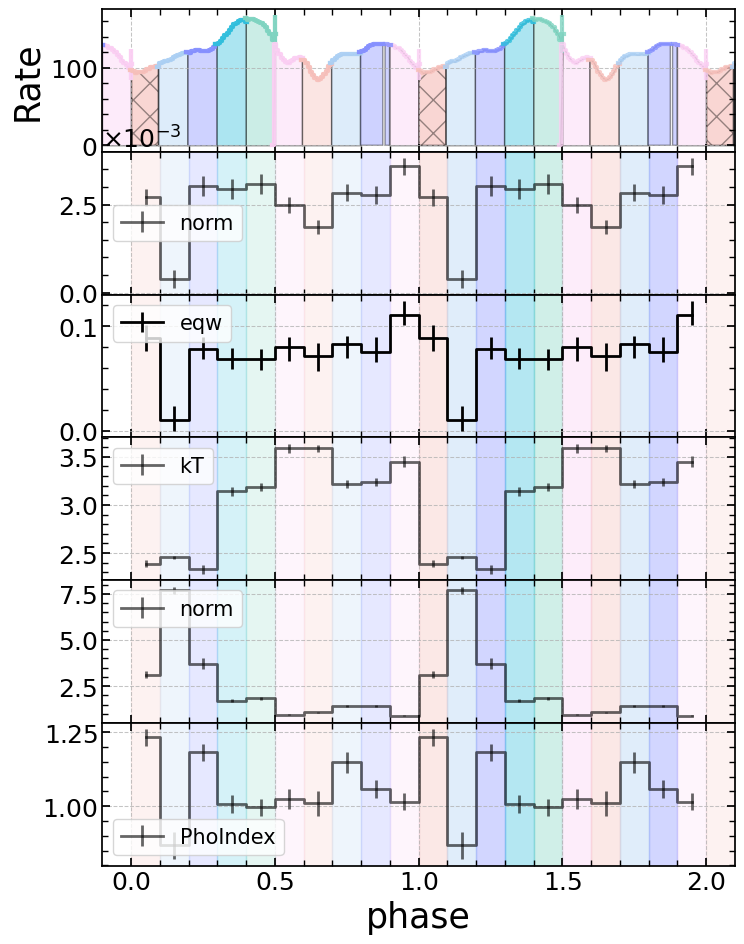

In [6]:
os.chdir(ph_res_folder)
model_name = 'cutoffpl'
ph_res_results_reind = scan_containers_ph_res(model_name)
ph_res_results_reind = ph_res_results_reind.sort_index()
ph_res_results_reind.head(25)



fig, [ax0, ax1, ax2, ax3, ax4, ax5] = plt.subplots(6, sharex=True, figsize  = (8, 10))


efolds = glob('*.efold')
_, phase_colors = nu_obs.check_efold_of_bins(prodpath='phase_resolved', efolds_files = efolds, fiducial = None , ax_efold = ax0, fig = fig, save = False, legend=False, phase_zero_efold='phase_resolved_bin1AB_sr.lc_bary_orb_corr_nphase_128.efold')



df, title = query_par(fit_res = ph_res_results_reind, ObsID = ObsID, model = model_name,    comp = 'gaussian',     par =  'norm', shift = prod_shift)
title = title.rsplit('.', 1)[1]
ph_res_param(df, label = title,  funct = lambda x: x, alpha = 0.6, color = 'k', colors = phase_colors, lw = 2, ax = ax1)


df, title = query_par(fit_res = ph_res_results_reind, ObsID = ObsID, model = model_name,    comp = 'gaussian',     par =  'eqw', shift = prod_shift)
title = title.rsplit('.', 1)[1]

ph_res_param(df, label = title,  funct = lambda x: x, alpha = 1, color = 'k',  lw = 2,  colors = phase_colors, ax = ax2)



df, title = query_par(fit_res = ph_res_results_reind, ObsID = ObsID, model = model_name,    comp = 'bbodyrad',     par =  'kT', shift = prod_shift)
title = title.rsplit('.', 1)[1]

ph_res_param(df, label = title,  funct = lambda x: x, alpha = 0.6, color = 'k', lw = 2, colors = phase_colors,  ax = ax3)

df, title = query_par(fit_res = ph_res_results_reind, ObsID = ObsID, model = model_name,    comp = 'bbodyrad',     par =  'norm', shift = prod_shift)
title = title.rsplit('.', 1)[1]

ph_res_param(df, label = title,  funct = lambda x: x, alpha = 0.6, color = 'k', lw = 2,  colors = phase_colors, ax = ax4)



df, title = query_par(fit_res = ph_res_results_reind, ObsID = ObsID, model = model_name,    comp = 'cutoffpl',     par =  'PhoIndex', shift = prod_shift)
title = title.rsplit('.', 1)[1]

ph_res_param(df, label = title,  funct = lambda x: x, alpha = 0.6, color = 'k', lw = 2, colors = phase_colors,  ax = ax5)



fig.tight_layout()
plt.subplots_adjust(hspace = 0.0)
fig.savefig(f'xspec/{model_name}/ph_res_param_{model_name}.png')

### spectral ratio

['phase_resolved_bin1A_sr.pi', 'phase_resolved_bin2A_sr.pi']
fitting done
fitting done


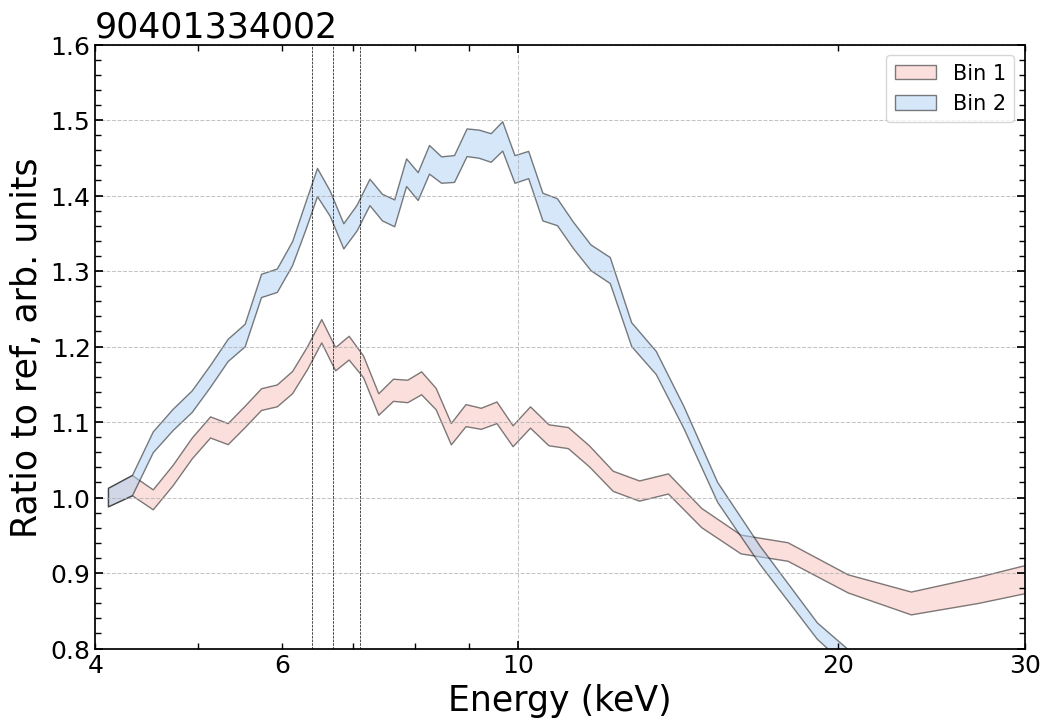

In [ ]:
from python_for_nustar.nu_core import plot_spe_ratio

mo_cutoffpl = Model("cutoffpl")
mo_cutoffpl.cutoffpl.PhoIndex = '1.1 -1'
mo_cutoffpl.cutoffpl.HighECut = '23 -1' # ,, 0.1, 0.2, 3, 4'

fig = plot_spe_ratio(model = mo_cutoffpl, ph_res_folder = ph_res_folder, bins_number=[1, 2], zoom_rat = [0.8, 1.6], title = ObsID, min_sig=75, min_bin = 75, colors = phase_colors)